In [33]:
import pandas as pd
import numpy as np


In [2]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [3]:
dataset_url='https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedfawadali
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 48.8MB/s]

In [5]:
import os

In [6]:
data_dir='./bank-customer-churn-prediction'

In [7]:
os.listdir(data_dir)

['Churn_Modelling.csv']

In [8]:
raw_train_dataset= data_dir+'/Churn_Modelling.csv'

In [9]:
train_dataset= pd.read_csv(raw_train_dataset)

In [10]:
train_dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Drop Irrelevant Columns

In [71]:
train_dataset=train_dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [12]:
train_dataset

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### info about dataset

In [13]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


### Max Median Min values

In [14]:
train_dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Identify Null values

In [15]:
train_dataset.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Exploratory Data Analysis and Visualization**

In [16]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as  tf
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **Exit Distribution**

0    7963
1    2037
Name: Exited, dtype: int64

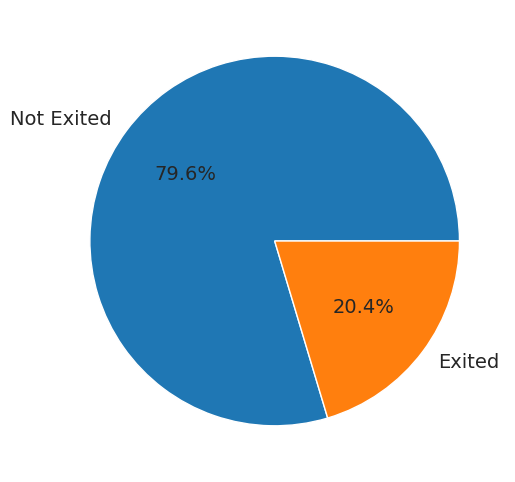

In [17]:
plt.pie(train_dataset['Exited'].value_counts(),labels=['Not Exited','Exited'],autopct='%1.1f%%')
train_dataset['Exited'].value_counts()

In [18]:
train_dataset['Gender'][train_dataset.Exited==0].value_counts()
train_dataset['Gender'][train_dataset.Exited==1].value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

### **Gender vs Exit**

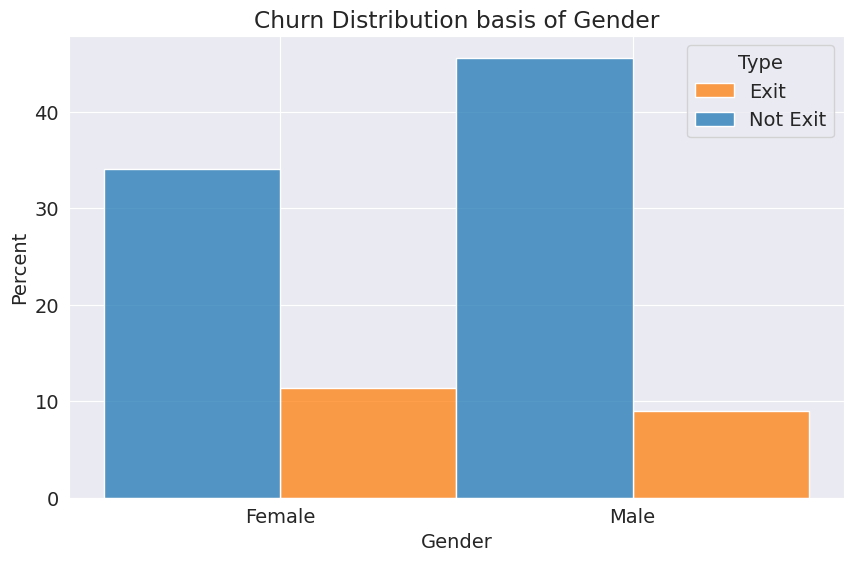

In [19]:
sns.histplot(data=train_dataset,x='Gender',hue='Exited',multiple='dodge',stat='percent')
plt.title('Churn Distribution basis of Gender')
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Location vs Exit**

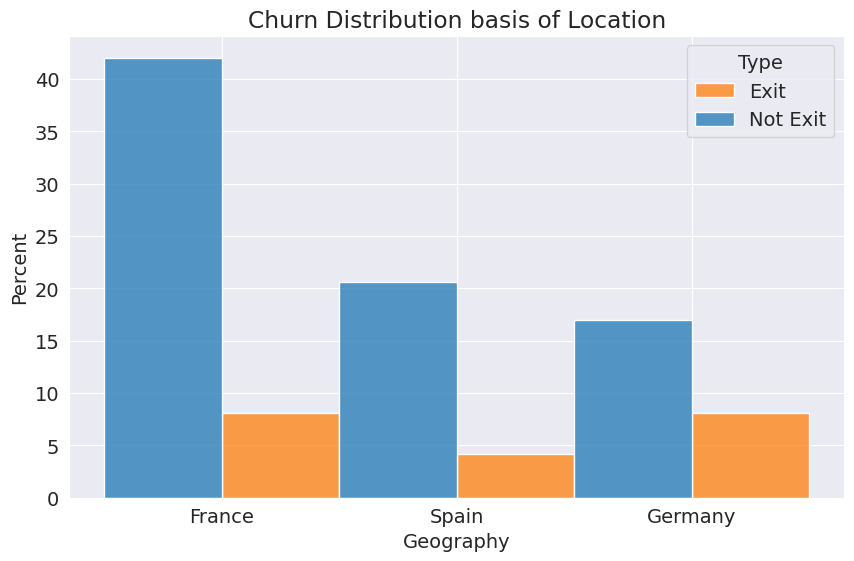

In [20]:
sns.histplot(data=train_dataset,x='Geography',hue='Exited',multiple='dodge',stat='percent')
plt.title('Churn Distribution basis of Location')
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Balance vs Exit**

###### Now we will plot KDE graph because it is plots a continuous random variable values, doesnot work on binnning as histogram does

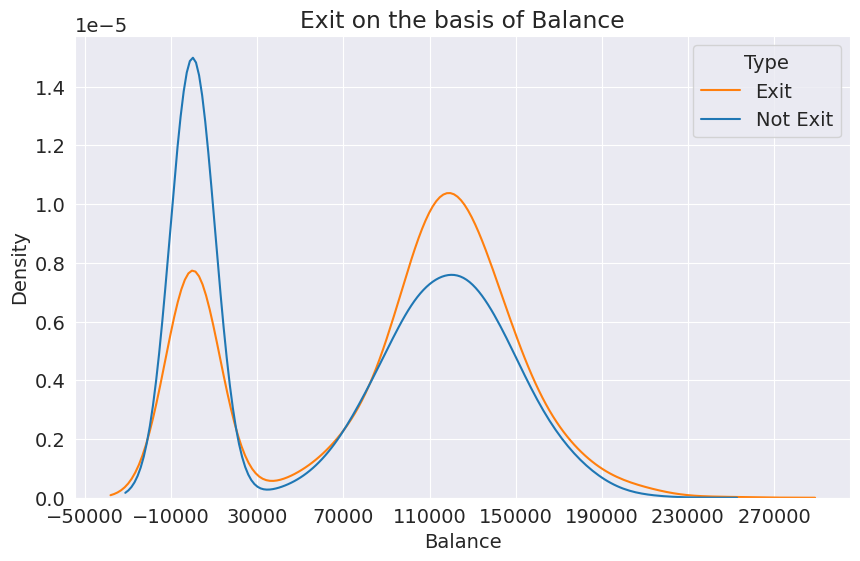

In [37]:
sns.kdeplot(data=train_dataset, x='Balance',hue='Exited',common_norm=False)
plt.title('Exit on the basis of Balance')
plt.xticks(np.arange(-50000,300000,40000))
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **No Of Products vs Exit**

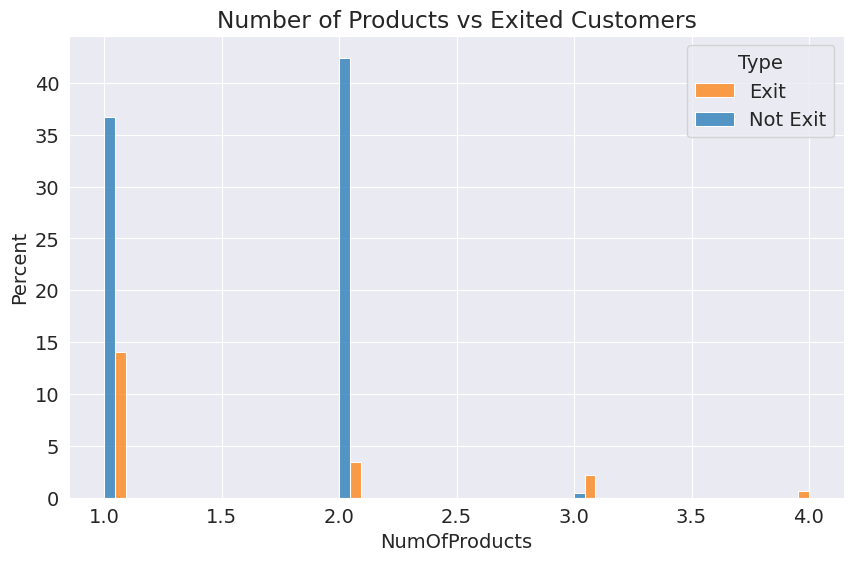

In [24]:
sns.histplot(data=train_dataset,x='NumOfProducts',hue='Exited',multiple='dodge',stat='percent')
plt.title('Number of Products vs Exited Customers')
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Credit Score  vs Exit**

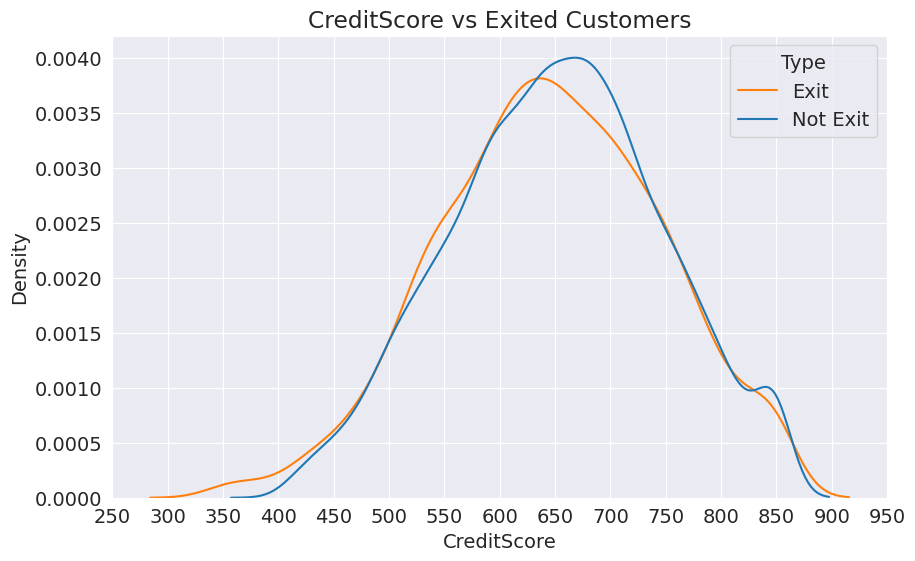

In [40]:
sns.kdeplot(data=train_dataset, x='CreditScore',hue='Exited',common_norm=False)
plt.title('CreditScore vs Exited Customers')
plt.xticks(np.arange(250,1000,50))
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Age vs Exit Customers**

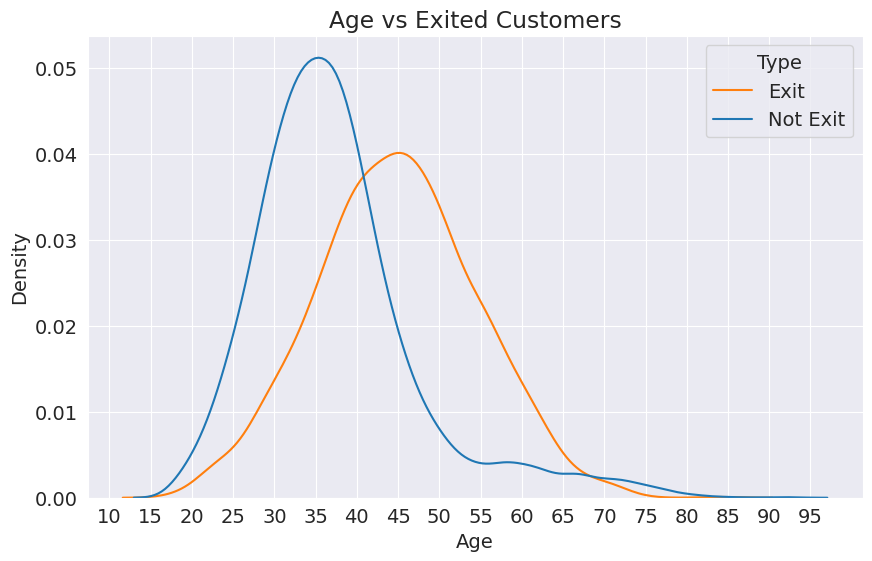

In [41]:
sns.kdeplot(data=train_dataset, x='Age',hue='Exited',common_norm=False)
plt.title('Age vs Exited Customers')
plt.xticks(np.arange(10,100,5))
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Tenure vs Exit Customers**

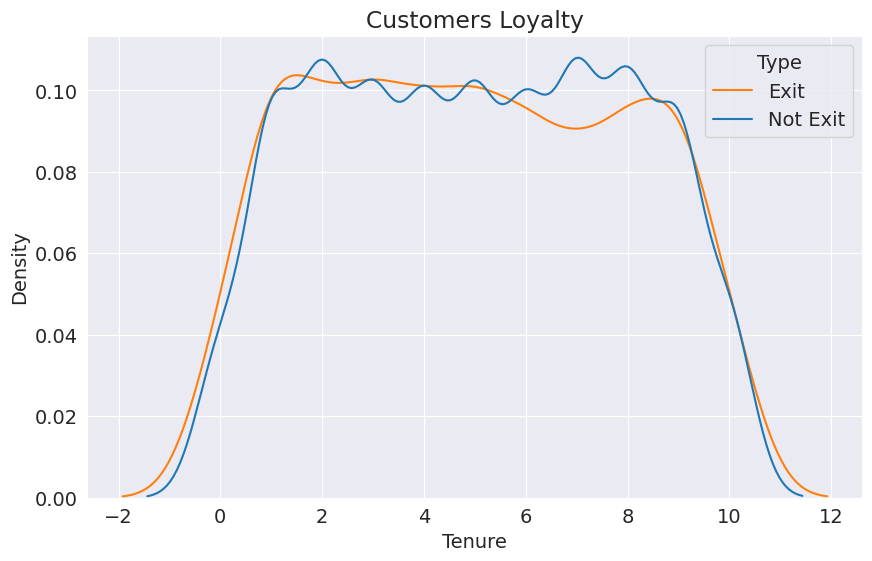

In [90]:
sns.kdeplot(data=train_dataset,x='Tenure' ,hue='Exited',common_norm=False)
plt.title('Customers Loyalty')
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

In [25]:
train_dataset.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **EstimatedSalary  vs Exit Customers**

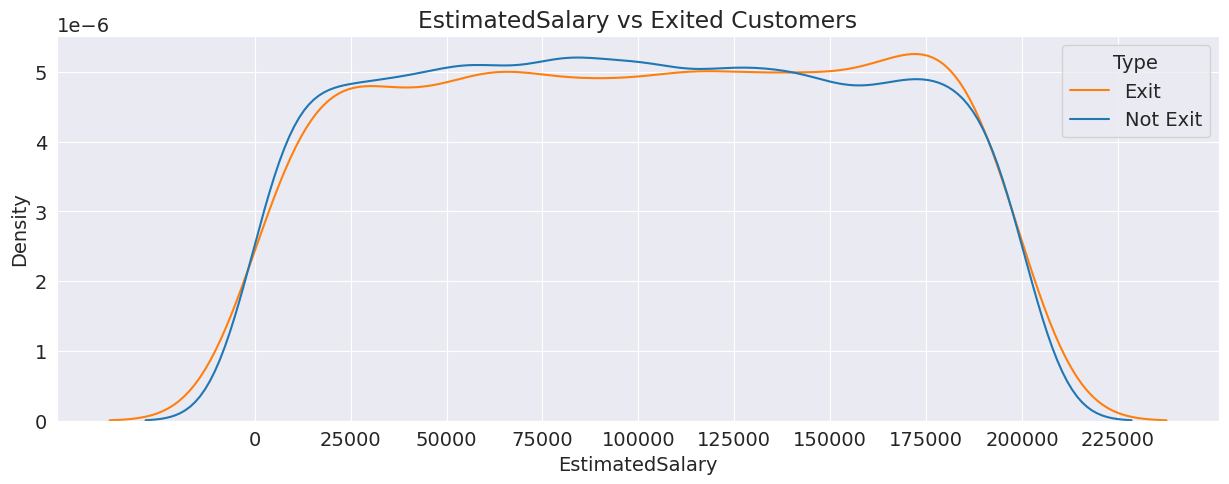

In [62]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=train_dataset,x='EstimatedSalary' ,hue='Exited',common_norm=False)
plt.title('EstimatedSalary vs Exited Customers')
plt.xticks(np.arange(0,250000,25000))
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **IsActiveMember vs Exited Customers**

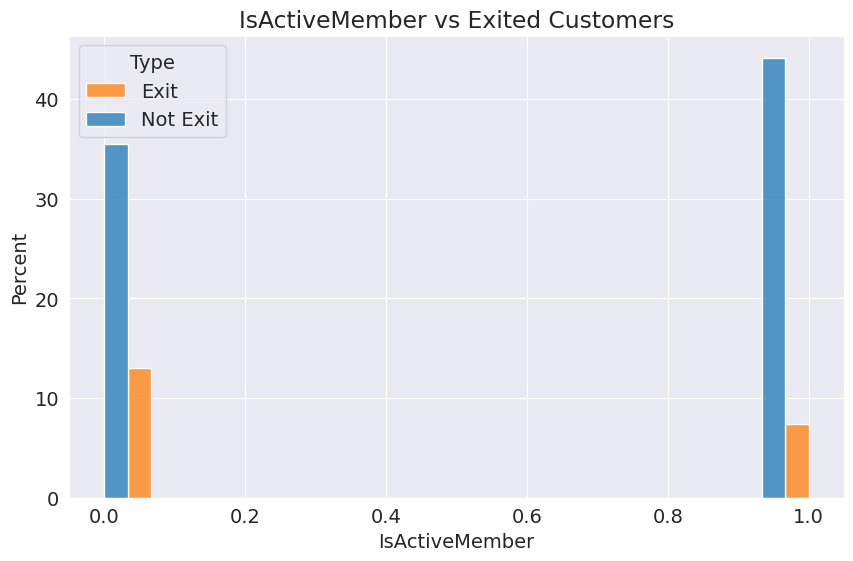

In [65]:
sns.histplot(data=train_dataset,x='IsActiveMember',hue='Exited',multiple='dodge',stat='percent')
plt.title('IsActiveMember vs Exited Customers')
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Has Credit Card vs Exited Customers**

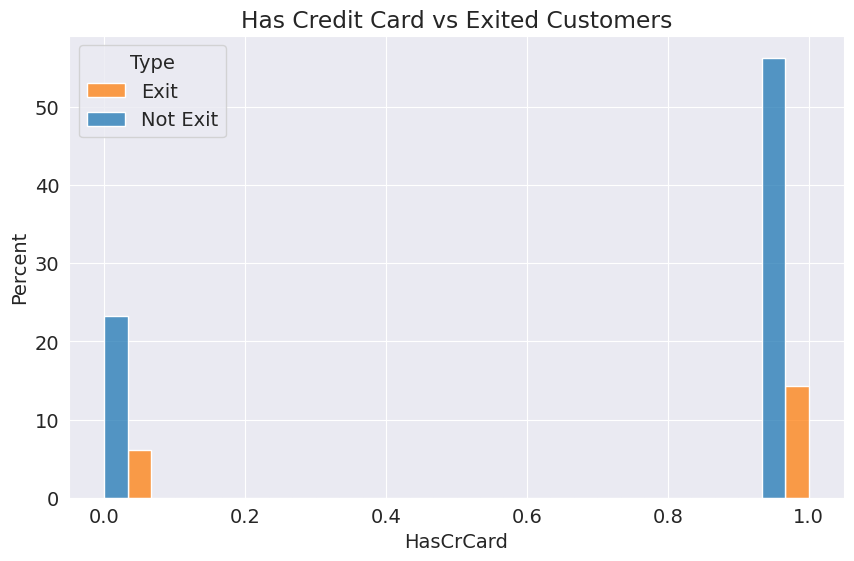

In [66]:
sns.histplot(data=train_dataset,x='HasCrCard',hue='Exited',multiple='dodge',stat='percent')
plt.title('Has Credit Card vs Exited Customers')
plt.legend(title='Type', labels=['Exit', 'Not Exit'])

### **Customer Churn basis of State**

In [95]:
Exit = train_dataset['Geography'][train_dataset.Exited==1].value_counts(normalize=True).to_frame().reset_index()
Exit.columns=['Geography', 'Exited']
Not_Exit = train_dataset['Geography'][train_dataset.Exited==0].value_counts(normalize=True).to_frame().reset_index()
Not_Exit.columns=['Geography', 'Not_Exited']

In [106]:
merging= Exit.merge(Not_Exit,on='Geography')
merging['difference'] = merging['Not_Exited'] - merging['Exited']

Text(0.5, 1.0, 'The Percentage of Exit over Non-Exit Transcations in Each State')

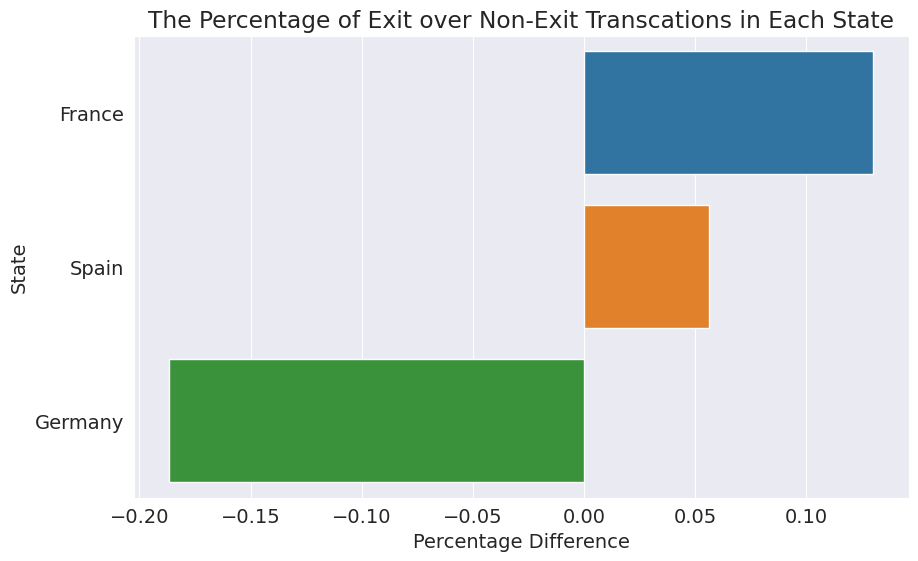

In [105]:
merged=merging.sort_values('difference',ascending=False)
ax1=sns.barplot(data=merged, x='difference',y='Geography')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Exit over Non-Exit Transcations in Each State')

# **Machine Learning Model**

### **Encoding the Categorical data**

#### **Converting the categorical columns into numerical by using get_dummies function as ML,DL only works on numerical data**

In [72]:
train_df=pd.get_dummies(train_dataset, columns=['Gender','Geography'], drop_first=True)

In [69]:
train_df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### **Now Split the dataset into train test split using sklearn lib**

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X=train_df.drop(columns=['Exited'])
y=train_df['Exited']

### **Balancing data through OverSampler; It replicates the data from the given existent minorty samples**

##### It can be done through SMOTE, as it generates the samples using interpolation

In [84]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class distribution before oversampling:", Counter(y))

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

print("Class distribution after oversampling:", Counter(y))

Class distribution before oversampling: Counter({0: 7963, 1: 2037})
Class distribution after oversampling: Counter({1: 7963, 0: 7963})


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)

## **Feature Scaling**

In [76]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### **model evaluation**

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

### **Logistic Regression**

In [87]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression:")
print("Accuracy:", accuracy*100 )
print("Classification Report:\n", classification_report(y_test, logistic_regression_pred))

Logistic Regression:
Accuracy: 69.2867905575088
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1978
           1       0.71      0.67      0.69      2004

    accuracy                           0.69      3982
   macro avg       0.69      0.69      0.69      3982
weighted avg       0.69      0.69      0.69      3982



### **Random Forest**

In [88]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

print("Random Forests:")
print("Accuracy:", accuracy_score(y_test, random_forest_pred))
print("Classification Report:\n", classification_report(y_test, random_forest_pred))

Random Forests:
Accuracy: 0.9482672024108488
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1978
           1       0.92      0.98      0.95      2004

    accuracy                           0.95      3982
   macro avg       0.95      0.95      0.95      3982
weighted avg       0.95      0.95      0.95      3982

